In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import yfinance as yf
import pandas_ta as ta
import seaborn as sns
import matplotlib.pyplot as plt

# Import

In [2]:
data = yf.download("^GDAXI", interval="1d", start="2010-01-01", end="2024-01-23")

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.columns = ['open','high','low','close','adj_close','volume']
data

,open,high,low,close,adj_close,volume
Date,,,,,,
2010-01-04,5975.520020,6048.299805,5974.430176,6048.299805,6048.299805,104344400
2010-01-05,6043.939941,6058.020020,6015.669922,6031.859863,6031.859863,117572100
2010-01-06,6032.390137,6047.569824,5997.089844,6034.330078,6034.330078,108742400
2010-01-07,6016.799805,6037.569824,5961.250000,6019.359863,6019.359863,133704300
2010-01-08,6028.620117,6053.040039,5972.240234,6037.609863,6037.609863,126099000
...,...,...,...,...,...,...
2024-01-16,16497.539062,16581.929688,16476.089844,16571.679688,16571.679688,73101900
2024-01-17,16400.419922,16435.679688,16345.019531,16431.689453,16431.689453,71437800
2024-01-18,16440.660156,16579.119141,16421.199219,16567.349609,16567.349609,72318600


# Missing Values

In [4]:
data.isna().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [5]:
zero = data==0
zero.sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       9
dtype: int64

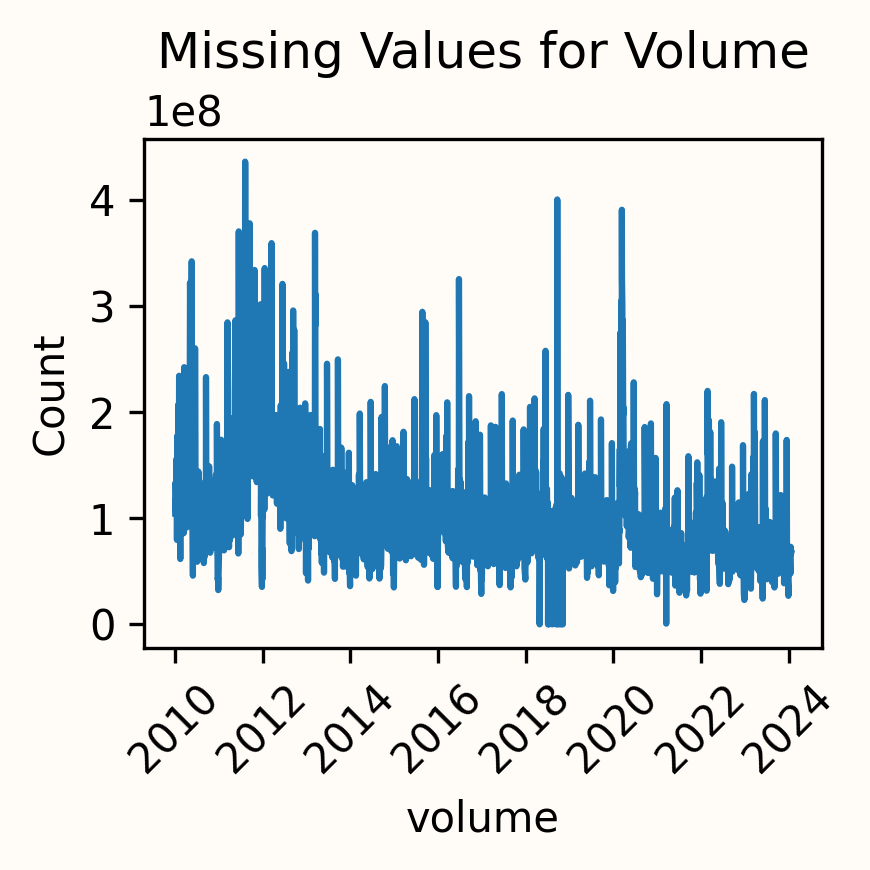

In [6]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
sns.lineplot(data=data, x=data.index, y='volume')
ax.set_ylabel("Count") 
ax.set_xlabel("volume") 
ax.set_title("Missing Values for Volume") 
plt.xticks(rotation=45)#ticks=data.index[::2]
plt.tight_layout()
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
#plt.savefig("../plots/missing_values_in_vol_before_2000.png")

# Calculating Direction

In [7]:
data['direction_num'] = data['close'] - data['open']
data['direction'] = [1 if value > 0 else 0 for value in data['direction_num']]
data.head()

,open,high,low,close,adj_close,volume,direction_num,direction
Date,,,,,,,,
2010-01-04,5975.520020,6048.299805,5974.430176,6048.299805,6048.299805,104344400,72.779785,1
2010-01-05,6043.939941,6058.020020,6015.669922,6031.859863,6031.859863,117572100,-12.080078,0
2010-01-06,6032.390137,6047.569824,5997.089844,6034.330078,6034.330078,108742400,1.939941,1
2010-01-07,6016.799805,6037.569824,5961.250000,6019.359863,6019.359863,133704300,2.560059,1
2010-01-08,6028.620117,6053.040039,5972.240234,6037.609863,6037.609863,126099000,8.989746,1


# Checking Adj Close difference

In [8]:
data['adj_diff'] = data['adj_close'] - data['close']
data['adj_diff'].value_counts() 

adj_diff
0.0    3567
Name: count, dtype: int64

##### diff is 0 in every row. Therefore I can drop the column "adj_close" because its has the same Information is in column "close"

In [9]:
#data.drop(['adj_close','adj_diff'], axis=1, inplace=True)
data.head()

,open,high,low,close,adj_close,volume,direction_num,direction,adj_diff
Date,,,,,,,,,
2010-01-04,5975.520020,6048.299805,5974.430176,6048.299805,6048.299805,104344400,72.779785,1,0.0
2010-01-05,6043.939941,6058.020020,6015.669922,6031.859863,6031.859863,117572100,-12.080078,0,0.0
2010-01-06,6032.390137,6047.569824,5997.089844,6034.330078,6034.330078,108742400,1.939941,1,0.0
2010-01-07,6016.799805,6037.569824,5961.250000,6019.359863,6019.359863,133704300,2.560059,1,0.0
2010-01-08,6028.620117,6053.040039,5972.240234,6037.609863,6037.609863,126099000,8.989746,1,0.0


# Calc Indicators

In [10]:
l_low = 3
l_mid = 7
l_high = 14
offset = 1
#SMA
data[f'sma_{l_low}']=data.ta.sma(length=l_low, offset=offset)
data[f'sma_{l_mid}']=data.ta.sma(length=l_mid, offset=offset)
data[f'sma_{l_high}']=data.ta.sma(length=l_high, offset=offset)
#EMA
data[f'ema_{l_low}']=data.ta.ema(length=l_low, offset=offset)
data[f'ema_{l_mid}']=data.ta.ema(length=l_mid, offset=offset)
data[f'ema_{l_high}']=data.ta.ema(length=l_high, offset=offset)
#MACD
data[['MACD_12_26_9','MACDh_12_26_9','MACDs_12_26_9']] = data.ta.macd(offset=offset)
#RSI
data[f'rsi_{l_low}']=data.ta.rsi(length=l_low, offset=offset)
data[f'rsi_{l_mid}']=data.ta.rsi(length=l_mid, offset=offset)
data[f'rsi_{l_high}']=data.ta.rsi(length=l_high, offset=offset)
#BBANDS
data[[f'BBL_{l_low}_2.0',f'BBM_{l_low}_2.0',f'BBU_{l_low}_2.0',f'BBB_{l_low}_2.0',f'BBP_{l_low}_2.0']] = data.ta.bbands(length=l_low, offset=offset)
data[[f'BBL_{l_mid}_2.0',f'BBM_{l_mid}_2.0',f'BBU_{l_mid}_2.0',f'BBB_{l_mid}_2.0',f'BBP_{l_mid}_2.0']] = data.ta.bbands(length=l_mid, offset=offset)
data[[f'BBL_{l_high}_2.0',f'BBM_{l_high}_2.0',f'BBU_{l_high}_2.0',f'BBB_{l_high}_2.0',f'BBP_{l_high}_2.0']] = data.ta.bbands(length=l_high, offset=offset)
#STOCH
data[['STOCHk_14_3_3','STOCHd_14_3_3']] = data.ta.stoch(offset=offset)
#ATR
data[f'atr_{l_low}']=data.ta.atr(length=l_low, offset=offset)
data[f'atr_{l_mid}']=data.ta.atr(length=l_mid, offset=offset)
data[f'atr_{l_high}']=data.ta.atr(length=l_high, offset=offset)
#psar
data[['PSARl_0.02_0.2','PSARs_0.02_0.2','PSARaf_0.02_0.2','PSARr_0.02_0.2']] = data.ta.psar(l_low, offset=offset)
#cmf
data[f'cmf_{l_low}']=data.ta.cmf(length=l_low, offset=offset)
data[f'cmf_{l_mid}']=data.ta.cmf(length=l_mid, offset=offset)
data[f'cmf_{l_high}']=data.ta.cmf(length=l_high, offset=offset)
#adx
data[[f'ADX_{l_low}',f'DMP_{l_low}',f'DMN_{l_low}']] = data.ta.macd(length=l_low, offset=offset)
data[[f'ADX_{l_mid}',f'DMP_{l_mid}',f'DMN_{l_mid}']] = data.ta.macd(length=l_mid, offset=offset)
data[[f'ADX_{l_high}',f'DMP_{l_high}',f'DMN_{l_high}']] = data.ta.macd(length=l_high, offset=offset)

In [11]:
#data.head()

# Dropping NaNs

In [12]:
data.isna().sum()

open                  0
high                  0
low                   0
close                 0
adj_close             0
volume                0
direction_num         0
direction             0
adj_diff              0
sma_3                 3
sma_7                 7
sma_14               14
ema_3                 3
ema_7                 7
ema_14               14
MACD_12_26_9         26
MACDh_12_26_9        34
MACDs_12_26_9        34
rsi_3                 4
rsi_7                 8
rsi_14               15
BBL_3_2.0             3
BBM_3_2.0             3
BBU_3_2.0             3
BBB_3_2.0             3
BBP_3_2.0             4
BBL_7_2.0             7
BBM_7_2.0             7
BBU_7_2.0             7
BBB_7_2.0             7
BBP_7_2.0             8
BBL_14_2.0           14
BBM_14_2.0           14
BBU_14_2.0           14
BBB_14_2.0           14
BBP_14_2.0           15
STOCHk_14_3_3        16
STOCHd_14_3_3        18
atr_3                 4
atr_7                 8
atr_14               15
PSARl_0.02_0.2  

In [13]:
data.drop(['PSARl_0.02_0.2','PSARs_0.02_0.2'],axis=1, inplace=True)

In [14]:
data.dropna(inplace=True)

In [15]:
#dropping every columns which has only one single value
list_of_col_zero=[]
for col in data.columns:
    if data[col].nunique()==1:
        list_of_col_zero.append(col)
data.drop(list_of_col_zero, axis=1, inplace=True)   
data.shape

(3533, 54)

# Convert to catergorical columns

In [16]:
list_of_col_to_convert=[f'sma_{l_low}',f'sma_{l_mid}',f'sma_{l_high}',
                        f'ema_{l_low}',f'ema_{l_mid}',f'ema_{l_high}',
                        f'BBL_{l_low}_2.0',f'BBM_{l_low}_2.0',f'BBU_{l_low}_2.0',f'BBP_{l_low}_2.0',
                        f'BBL_{l_mid}_2.0',f'BBM_{l_mid}_2.0',f'BBU_{l_mid}_2.0',f'BBP_{l_mid}_2.0',
                        f'BBL_{l_high}_2.0',f'BBM_{l_high}_2.0',f'BBU_{l_high}_2.0',f'BBP_{l_high}_2.0',
                        ]
list_of_col_to_convert

['sma_3',
 'sma_7',
 'sma_14',
 'ema_3',
 'ema_7',
 'ema_14',
 'BBL_3_2.0',
 'BBM_3_2.0',
 'BBU_3_2.0',
 'BBP_3_2.0',
 'BBL_7_2.0',
 'BBM_7_2.0',
 'BBU_7_2.0',
 'BBP_7_2.0',
 'BBL_14_2.0',
 'BBM_14_2.0',
 'BBU_14_2.0',
 'BBP_14_2.0']

In [17]:
threshold = 'open'
for col in list_of_col_to_convert:
    data['pos_{}'.format(col)] = np.where(data[col] > data[threshold], 1, 0)

In [18]:
data.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'direction_num',
       'direction', 'sma_3', 'sma_7', 'sma_14', 'ema_3', 'ema_7', 'ema_14',
       'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'rsi_3', 'rsi_7',
       'rsi_14', 'BBL_3_2.0', 'BBM_3_2.0', 'BBU_3_2.0', 'BBB_3_2.0',
       'BBP_3_2.0', 'BBL_7_2.0', 'BBM_7_2.0', 'BBU_7_2.0', 'BBB_7_2.0',
       'BBP_7_2.0', 'BBL_14_2.0', 'BBM_14_2.0', 'BBU_14_2.0', 'BBB_14_2.0',
       'BBP_14_2.0', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'atr_3', 'atr_7',
       'atr_14', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'cmf_3', 'cmf_7',
       'cmf_14', 'ADX_3', 'DMP_3', 'DMN_3', 'ADX_7', 'DMP_7', 'DMN_7',
       'ADX_14', 'DMP_14', 'DMN_14', 'pos_sma_3', 'pos_sma_7', 'pos_sma_14',
       'pos_ema_3', 'pos_ema_7', 'pos_ema_14', 'pos_BBL_3_2.0',
       'pos_BBM_3_2.0', 'pos_BBU_3_2.0', 'pos_BBP_3_2.0', 'pos_BBL_7_2.0',
       'pos_BBM_7_2.0', 'pos_BBU_7_2.0', 'pos_BBP_7_2.0', 'pos_BBL_14_2.0',
       'pos_BBM_14_2.0', 'pos_BBU_14_2.0', 'p

# Dropping the OHLC-Prices

In [19]:
data.drop(['open','high','low','close','adj_close'], axis=1, inplace=True)

# Automated features selection

In [20]:
#another way instead of drop the zeros would be this:
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.02
# sel = VarianceThreshold() has a default value for variance = 0.00
sel = VarianceThreshold(threshold=(var_threshold))

# 1) default is threshold = 0 :eliminate all columns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply
#    a different threshold for different columns

# This determines which columns that have a variance less than this threshold
sel = sel.fit(data)
temp = sel.transform(data)
temp_df = pd.DataFrame(temp, columns=sel.get_feature_names_out())
print(data.shape)
print(temp_df.shape)

(3533, 67)
(3533, 62)


In [21]:
#dropping the columns with var_threshold
data = data[sel.get_feature_names_out().tolist()]
data.shape

(3533, 62)

# EDA

In [22]:
len(data.columns.tolist())

62

In [23]:
'''
n = len(data.columns.tolist())
i = 0
fig, ax = plt.subplots(n,1, figsize=(10,n+10), dpi=300)
for col in data.columns:
    sns.histplot(data=data, x=col, ax=ax[i])
    ax[i].set_ylabel("Count") 
    ax[i].set_xlabel(col) 
    i += 1
#plt.xticks(rotation=45)#ticks=data.index[::2]
plt.tight_layout()
plt.show()
plt.rcParams'''

'\nn = len(data.columns.tolist())\ni = 0\nfig, ax = plt.subplots(n,1, figsize=(10,n+10), dpi=300)\nfor col in data.columns:\n    sns.histplot(data=data, x=col, ax=ax[i])\n    ax[i].set_ylabel("Count") \n    ax[i].set_xlabel(col) \n    i += 1\n#plt.xticks(rotation=45)#ticks=data.index[::2]\nplt.tight_layout()\nplt.show()\nplt.rcParams'

# Corrolation Matrix

In [24]:
'''correlations_matrix = data.corr()
correlation_with_target = correlations_matrix['direction'].sort_values(ascending=False)
fig, ax = plt.subplots(1,1, figsize=(50,50), dpi=300)
sns.heatmap(correlations_matrix, annot=True)
plt.tight_layout()
plt.show()
plt.savefig("../plots/Heatmap.png")'''

'correlations_matrix = data.corr()\ncorrelation_with_target = correlations_matrix[\'direction\'].sort_values(ascending=False)\nfig, ax = plt.subplots(1,1, figsize=(50,50), dpi=300)\nsns.heatmap(correlations_matrix, annot=True)\nplt.tight_layout()\nplt.show()\nplt.savefig("../plots/Heatmap.png")'

In [25]:
def select_features_based_on_multicorrelation(df: pd.DataFrame, threshold=0.99) -> list:
    '''

    '''
    list_of_selected_columns = []
    corrmatrix = data.corr()
    for key, value in corrmatrix[corrmatrix > threshold].count().items():
        if value > 2:
            list_of_selected_columns.append(key)
    
    return list_of_selected_columns

In [26]:
select_features_based_on_multicorrelation(data)

['sma_3',
 'sma_7',
 'sma_14',
 'ema_3',
 'ema_7',
 'ema_14',
 'MACD_12_26_9',
 'MACDh_12_26_9',
 'MACDs_12_26_9',
 'BBL_3_2.0',
 'BBM_3_2.0',
 'BBU_3_2.0',
 'BBL_7_2.0',
 'BBM_7_2.0',
 'BBU_7_2.0',
 'BBL_14_2.0',
 'BBM_14_2.0',
 'BBU_14_2.0',
 'ADX_3',
 'DMP_3',
 'DMN_3',
 'ADX_7',
 'DMP_7',
 'DMN_7',
 'ADX_14',
 'DMP_14',
 'DMN_14']

In [27]:
list_to_drop = ['sma_3',
 'sma_7',
 'sma_14',
 'ema_3',
 'ema_7',
 'ema_14',
 'BBL_3_2.0',
 'BBM_3_2.0',
 'BBU_3_2.0',
 'BBL_7_2.0',
 'BBM_7_2.0',
 'BBU_7_2.0',
 'BBL_14_2.0',
 'BBM_14_2.0',
 'BBU_14_2.0',
 'MACD_12_26_9',
 'MACDh_12_26_9',
 'MACDs_12_26_9']
#data.drop(list_to_drop, axis=1, inplace=True)

In [28]:
'''correlations_matrix = data.corr()
fig, ax = plt.subplots(1,1, figsize=(50,50), dpi=300)
sns.heatmap(correlations_matrix, annot=True)
plt.tight_layout()
plt.show()
plt.savefig("../plots/Heatmap.png")'''

'correlations_matrix = data.corr()\nfig, ax = plt.subplots(1,1, figsize=(50,50), dpi=300)\nsns.heatmap(correlations_matrix, annot=True)\nplt.tight_layout()\nplt.show()\nplt.savefig("../plots/Heatmap.png")'

In [29]:
'''correlation_with_target =abs(correlations_matrix['direction']).sort_values(ascending=False)
round(correlation_with_target,3)'''

"correlation_with_target =abs(correlations_matrix['direction']).sort_values(ascending=False)\nround(correlation_with_target,3)"

# Export

In [30]:
cat_col_names = [col for col in data.columns if 'pos' in col]
cat_col_names = pd.DataFrame(cat_col_names)

In [31]:
#only when i want to drop the categorical columns
#data.drop(cat_col_names[0].tolist(), axis=1, inplace=True)

In [32]:
display(data.head())
display(data.shape)

,volume,direction_num,direction,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-19,121594600,94.790039,1,5640.290039,5567.522949,5568.541469,5639.855728,5595.033937,5600.607976,-100.308660,...,0,0,1,1,0,0,1,0,0,1
2010-02-22,94749200,-52.560059,0,5683.599935,5594.048619,5573.367885,5680.952766,5626.787904,5616.800220,-82.558273,...,0,0,0,1,0,0,1,0,0,1
2010-02-23,138143800,-111.560059,0,5696.966634,5620.407157,5571.852155,5684.696354,5642.200913,5626.352182,-70.391568,...,0,0,0,1,0,0,1,0,0,1
2010-02-24,130761600,-6.800293,0,5671.519857,5635.218541,5566.993583,5644.383089,5632.668141,5623.381201,-66.787446,...,1,0,1,1,0,1,1,0,0,1
2010-02-25,150089500,-30.370117,0,5636.006510,5650.134208,5572.869978,5629.946427,5628.378547,5622.331677,-62.290006,...,1,0,1,1,0,1,1,0,1,1


(3533, 62)

In [33]:
data.to_csv('../data/dax_indicator_2000_2024.csv')

In [34]:
cat_col_names.to_csv('../data/temp_cat_col_names.csv')